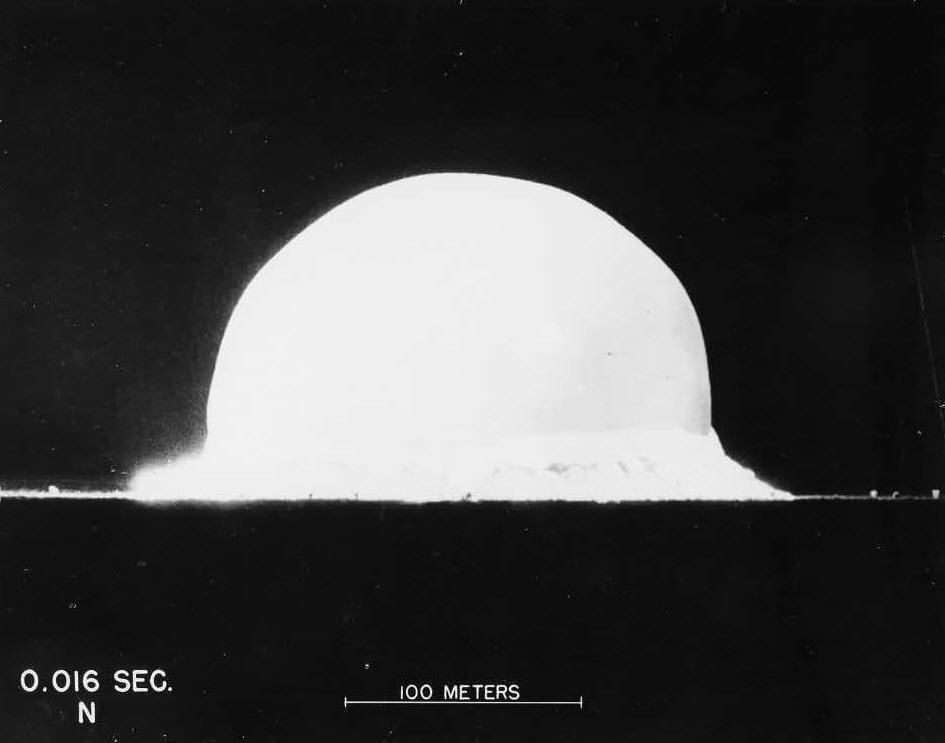

In [2]:
from IPython.display import Image
Image("Trinity0_016sec.jpg",width = 400)



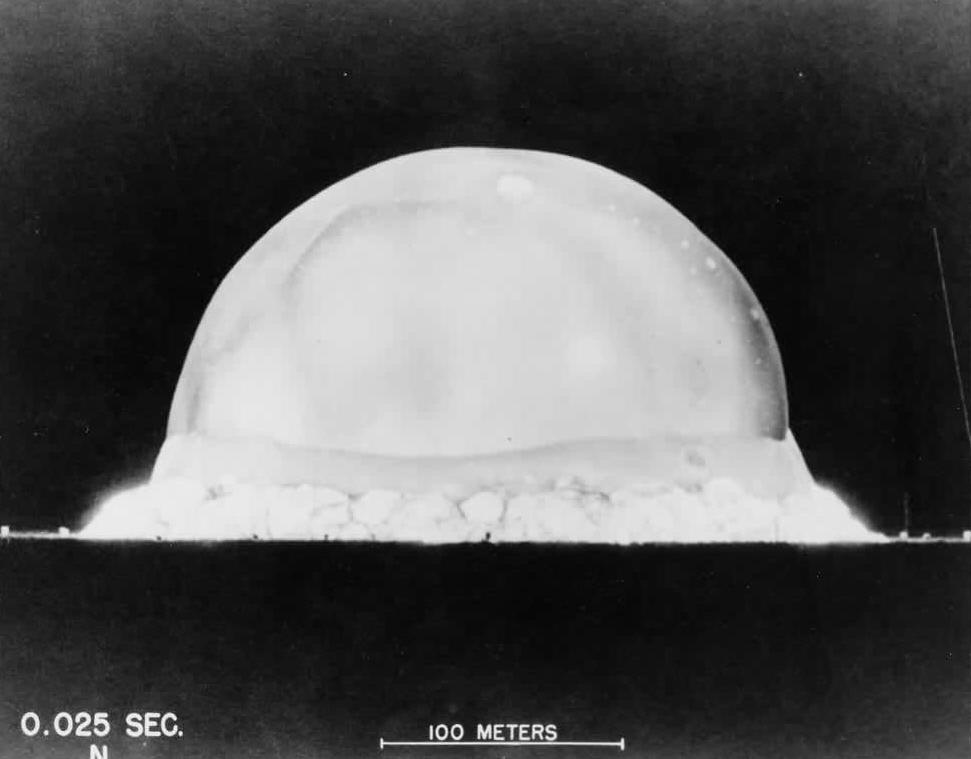

In [3]:
Image("Trinity0_025sec.jpg",width = 400)


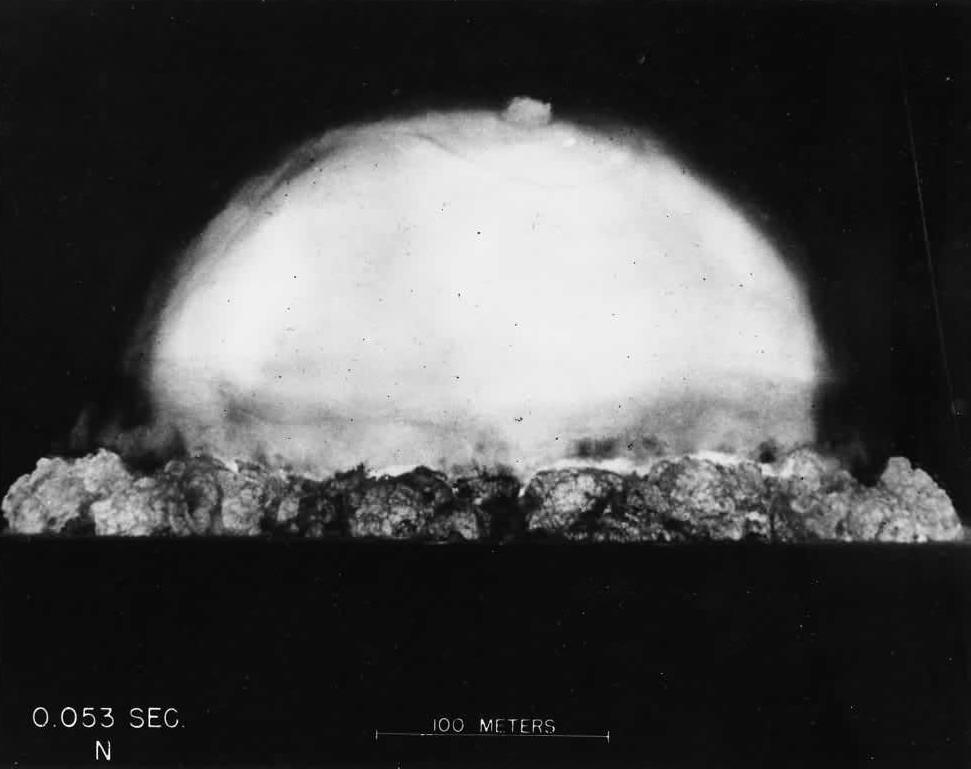

In [4]:
Image("Trinity0_052sec.jpg",width = 400)


In [5]:
Image("Trinity0_1sec.jpg",width = 400)


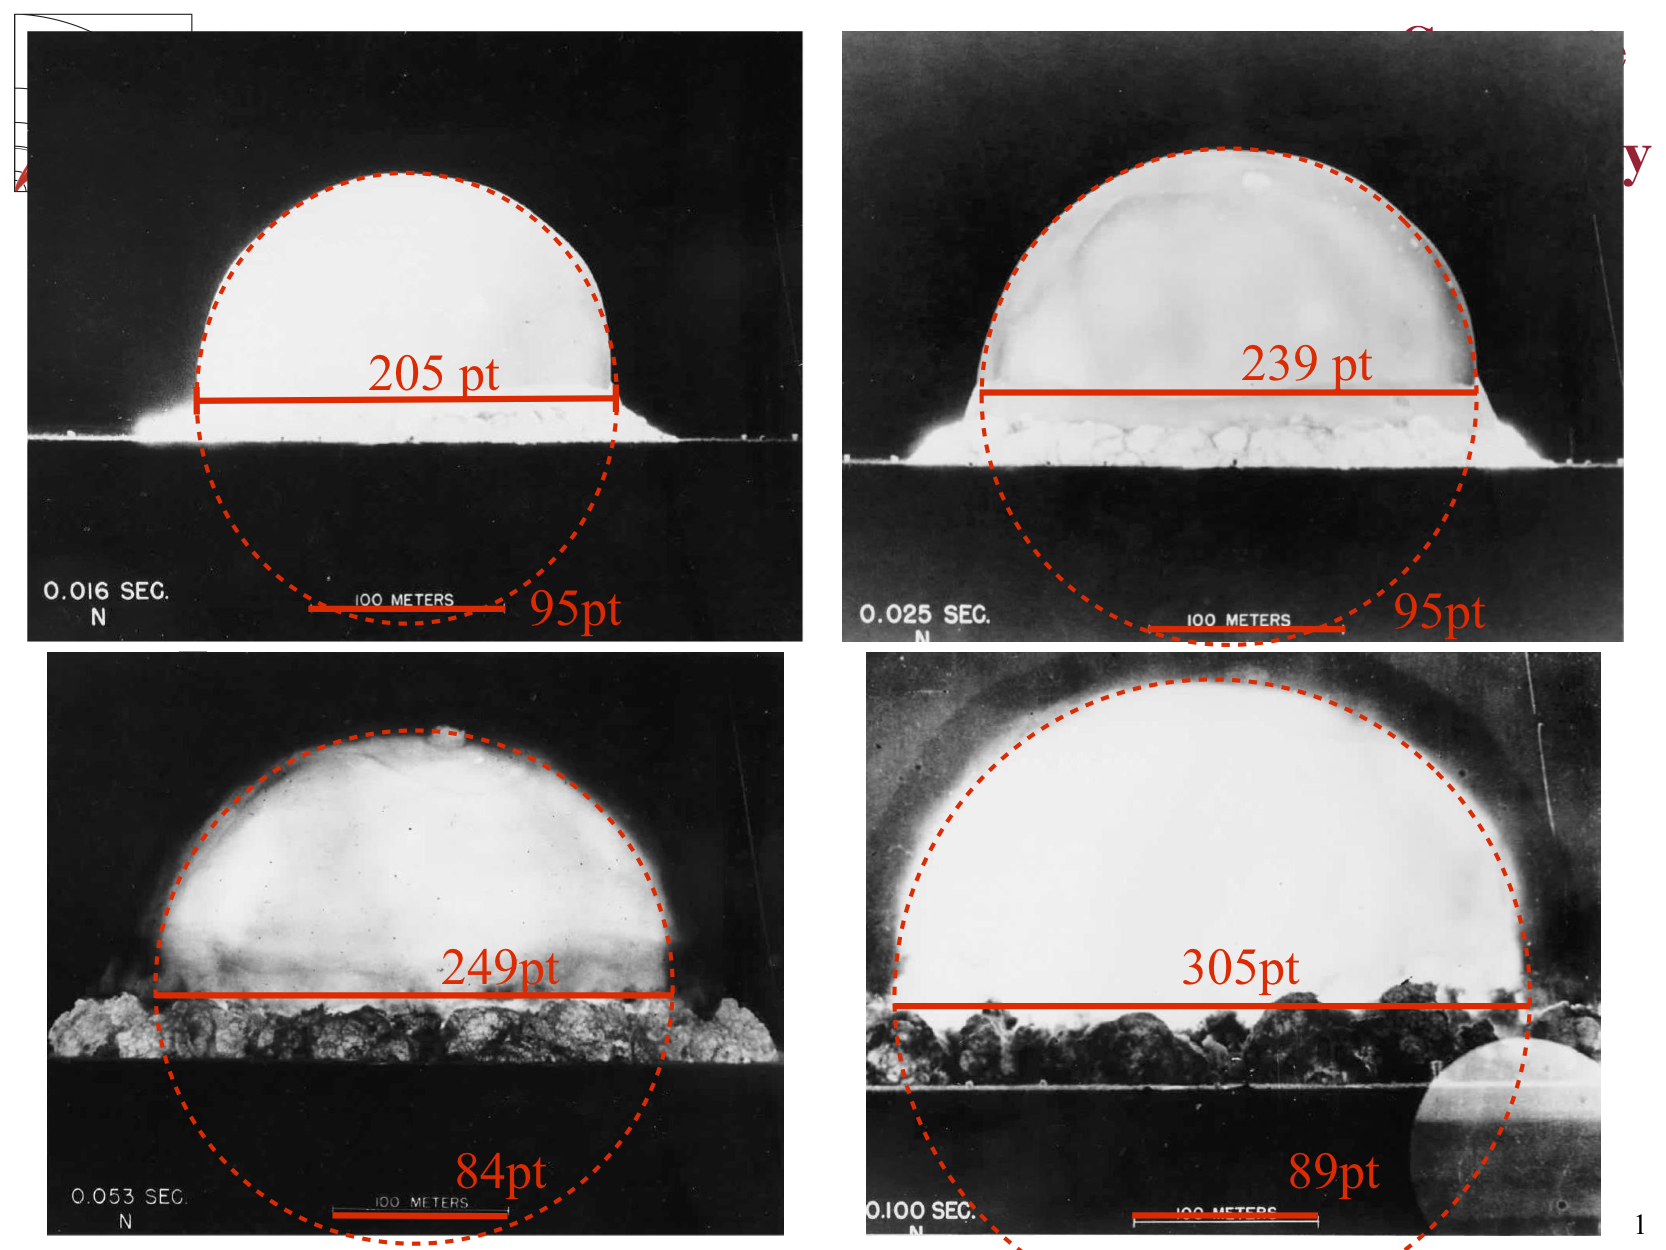

In [6]:
Image("TrinityMeasurements.png",width = 600)


In [46]:
rawCounts = [202,246,277,370]
lengthScale = [95,95,84,89]
times = [0.016,0.025,0.053,0.100]


# Calibrate lengths

In [47]:
radii = []
for i in range(len(rawCounts)):
    radii.append(0.50*rawCounts[i]*100/lengthScale[i])


In [48]:
radii

[106.3157894736842, 129.47368421052633, 164.88095238095238, 207.86516853932585]

In [49]:
times

[0.016, 0.025, 0.053, 0.1]

In [50]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Radius [m]')

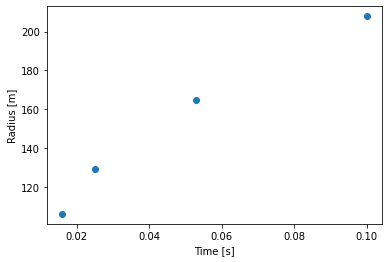

In [51]:
fig, ax = plt.subplots(1) 
# ny is 60.014 0.1
plt.scatter(times, radii) 
plt.xlabel('Time [s]') 
plt.ylabel('Radius [m]') 


# Dimensional Analysis

Energy: $ [E] = \frac{M L^2}{T^2}  $


Air Mass Density: $ [\rho] = \frac{M}{L^3} $

So distance is given by

$R \sim \left(\frac{E t^2}{\rho} \right)^{1/5} $

Or $log(R) = \frac{2}{5} log (t) + \frac{1}{5}(log(E) - log(\rho)) $

In [52]:
logTime = np.log(times)
logRadii = np.log(radii)
print(logTime)
print(logRadii)

[-4.13516656 -3.68887945 -2.93746337 -2.30258509]
[4.66641381 4.86347765 5.10522371 5.33688964]


Text(0, 0.5, 'log(Radius [m])')

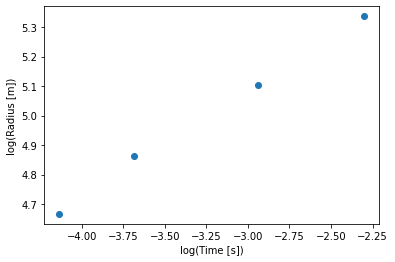

In [53]:
fig, ax = plt.subplots(1) 
# ny is 60.014 0.1
plt.scatter(logTime, logRadii )
plt.xlabel('log(Time [s])') 
plt.ylabel('log(Radius [m])') 

# Lets fit

In [54]:
from scipy.optimize import curve_fit


In [55]:
# define the true objective function
def objective(x, m, b):
    return m * x + b

In [56]:
# curve fit
popt, errs = curve_fit(objective, logTime, logRadii)
# summarize the parameter values
m, b = popt
print('y = %.5f * x + %.5f' % (m, b))

y = 0.35872 * x + 6.16458


In [57]:
xVals = np.linspace(-5,-1, 100)
fig, ax = plt.subplots(1) 
# ny is 60.014 0.1
plt.scatter(logTime, logRadii )
plt.xlabel('log(Time [s])') 
plt.ylabel('log(Radius [m])') 
plt.plot(xVals,objective(xVals,m,b),'r:')
plt.plot(xVals,objective(xVals,2/5,6.25),'g:')

# Sanity Check

In [58]:
(2/5)

0.4

In [32]:
b

6.16004086991602

Now, $\rho \sim 1 \frac{kg}{m^3} $

$b = \frac{1}{5}(log(E) - log(\rho))$

So, $ E \sim e^{5b + log(\rho)}$

In [19]:
E = np.e**(5*b + np.log(1.2))

In [20]:
print(f"{E:.2e}")
print(E)

3.14e+12
3139429967440.597


Try number two

In [21]:
rawCounts2 = [113,160,156,215,226]
lengthScale2 = [75,75,59,75,75]
times2 = [0.006,0.016,0.025,0.053,0.062]

In [22]:
radii2 = []
for i in range(len(rawCounts2)):
    radii2.append(0.50*rawCounts2[i]*100/lengthScale2[i])

In [23]:
radii

[107.89473684210526,
 125.78947368421052,
 148.21428571428572,
 171.34831460674158]

In [24]:
radii2

[75.33333333333333,
 106.66666666666667,
 132.20338983050848,
 143.33333333333334,
 150.66666666666666]

In [25]:
logTime2 = np.log(times2)
logRadii2 = np.log(radii2)

Text(0, 0.5, 'log(Radius [m])')

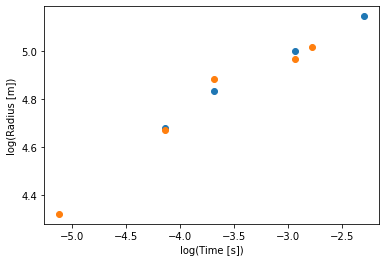

In [26]:
fig, ax = plt.subplots(1) 
# ny is 60.014 0.1
plt.scatter(logTime, logRadii )
plt.scatter(logTime2, logRadii2 )

plt.xlabel('log(Time [s])') 
plt.ylabel('log(Radius [m])') 

In [32]:
# curve fit
popt2, errs2 = curve_fit(objective, logTime2, logRadii2)
# summarize the parameter values
m2, b2 = popt2
print('y = %.5f * x + %.5f' % (m2, b2))

y = 0.29139 * x + 5.85859


In [33]:
2/5

0.4

In [34]:
E2 = np.e**(5*b2 + np.log(1.2))

In [35]:
print(f"{E2:.2e}")
print(E2)

6.32e+12
6323216734495.188


In [36]:
print(f"{E:.2e}")
print(E)

3.14e+12
3139429967440.597
